# Simulated Annealing

It is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a **metaheuristic** to approximate global optimization in a large search space for an optimization problem. It is often used when the search space is discrete (e.g., the traveling salesman problem).<br/>
*For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to alternatives such as **gradient descent**.* <br/>

The notion of slow cooling implemented in the simulated annealing algorithm is interpreted as a slow decrease in the probability of accepting worse solutions as the solution space is explored. This is achieved by the acceptance probability function P(e,e',T) was defined as 1 if e'<e, and exp(-(e'-e)/T) otherwise

In [231]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

In [232]:
def fitness_function(x):
    m = 1 + (np.cos(0.04*x))**2
    n = np.exp(-x*x/20000)
    return m*n

## Plotting the fitness function

Text(0.5, 1.0, 'Fitness Surface')

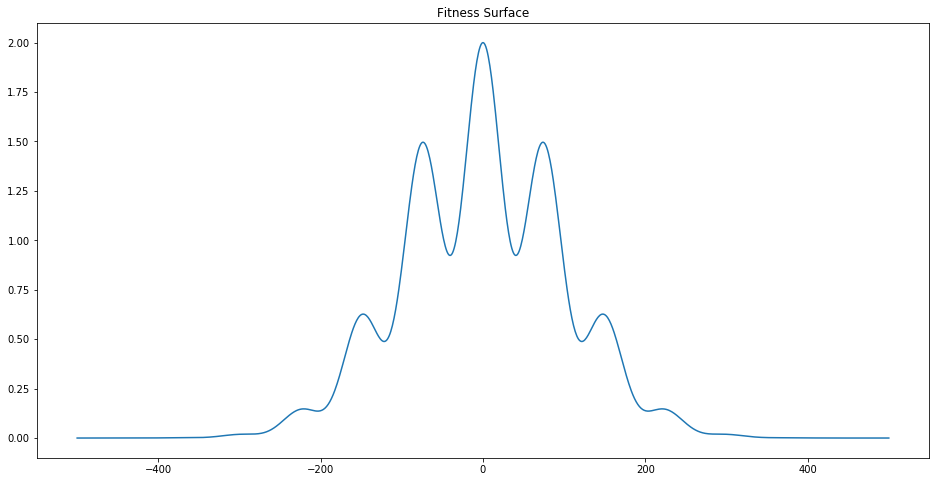

In [233]:
x = np.linspace(-500,500,num=1000) # evenly spaced numbers over a specified interval (-500,500)
y = fitness_function(x)
plt.plot(x,y)
plt.title("Fitness Surface")

## SA Algorithm

In [304]:
interval = (-500, 500)

def update_temperature(fraction, T0):
    """Cooling Schedule"""
    return max(0.01,T0*(1.0 - fraction))
#     return T*0.9
#     return T + T*fraction

def clip(x):
    """ To keep updated x in the interval."""
    a, b = interval
    return max(min(x, b), a)
#     return np.array([max(min(i, b), a) for i in x])

def random_neighbour(x, fraction):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 5
    delta = (-amplitude/2.) + amplitude * np.random.random_sample()
    return clip(x + delta)
#     return x + random.uniform(-20,20)

def acceptance_probability(energy, new_energy, temperature):
    """Acceptance probability function"""
    if new_energy > energy:
        return 1
    else:
        return np.exp(- (new_energy - energy) / temperature)

def annealing(init_state, cost_function,random_neighbour,T0,maxiter=1000,debug=True):
    # Initial state
    state = init_state
    # Energy => Value of the objective function
    energy = cost_function(state)
    states, energies = [state], [energy]
    for step in range(maxiter):
        fraction = step/float(maxiter)
        T = update_temperature(fraction, T0)
        new_state = random_neighbour(state, fraction)
        new_energy = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, energy = {:>4.3g}, new_state = {:>4.3g}, new_energy = {:>4.3g} ...".format(step, maxiter, T, state, energy, new_state, new_energy))
#         if debug and step%5==0: print("Step #{:>2}/{:>2} : T = {:>4.3g}, energy = {:>4.3g}, new_energy = {:>4.3g} ...".format(step, maxiter, T, energy, new_energy))
        # Criteria for acceptance of new state:
        # If new state is better : new energy is better (depending on minimization/maximization) then update state
        # Else accept a bad state with some probability depending on exp(-(e'-e)/T) > a random number
        if acceptance_probability(energy, new_energy, T) > np.random.random():
            state, energy = new_state, new_energy
            states.append(state)
            energies.append(energy)
#         if energy > 1.8:
#             print("Peak at step:",step)
#             break
    return state, cost_function(state), states, energies

In [311]:
# Initial State
init_state = 250
# Initial Temperature
T0 = 10
state, c, states, energies = annealing(init_state, fitness_function, random_neighbour,T0,maxiter=500,debug=False)

print("Final State:", state)
print("Final Fitness value:", c)

Final State: 331.44972065454436
Final Fitness value: 0.006557264307537797


## Plotting Fitness Surface with output of the SA algorithm

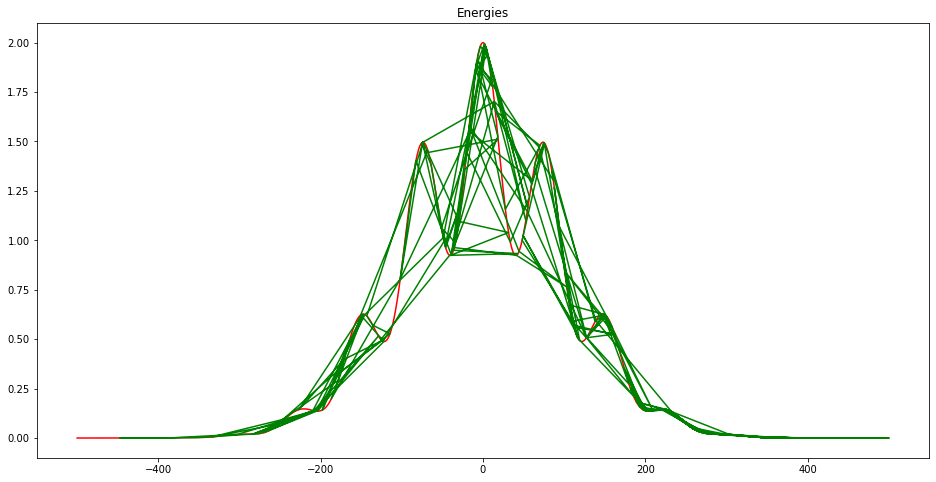

In [312]:
plt.plot(x,y,'r')
plt.plot(states,np.array(energies),'g')
plt.title("Energies")
plt.show()

## Plotting the Intermediate states and energies

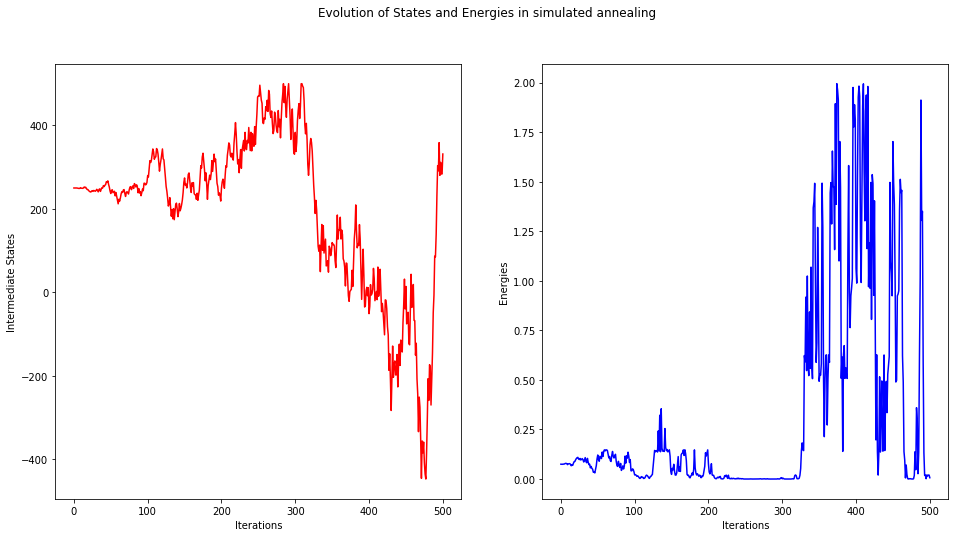

In [313]:
plt.figure()
plt.suptitle("Evolution of States and Energies in simulated annealing")
plt.subplot(121)
plt.plot(states, 'r')
plt.ylabel("Intermediate States")
plt.xlabel("Iterations")
plt.subplot(122)
plt.plot(energies, 'b')
plt.ylabel("Energies")
plt.xlabel("Iterations")
plt.show()

## Exploring the role of temperature
### And Counting the number of times peak of the fitness function is reached

In [12]:
def multiple_runs(T0, maxiter):
    init_state = 250
    peak_found = 0
    for i in range(maxiter):
        state, c, states, energies = annealing(init_state, fitness_function, random_neighbour,T0, debug=False)
        if c >=1.75:
            peak_found+=1
    return 100*peak_found/float(maxiter)

In [318]:
temps = np.array(range(100,10000,100))/10
print(temps)
peak_percentage = []
for T in temps:
    peak_percentage.append(multiple_runs(T,100))
plt.plot(temps,peak_percentage)
plt.ylabel("Temperature")
plt.xlabel("Peak %")

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270. 280.
 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410. 420.
 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550. 560.
 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690. 700.
 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830. 840.
 850. 860. 870. 880. 890. 900. 910. 920. 930. 940. 950. 960. 970. 980.
 990.]


KeyboardInterrupt: 